In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
plt.style.use('./mpl/manuscript.mplstyle')
aspect = 1.5
plt.rcParams['figure.figsize'] = 2.5, 4

In [2]:
filename = Path('../../data/seismic/TS17_HR_03X_RMSVelocity_CDP_5320.txt').resolve()

data = np.loadtxt(filename, delimiter=' ', skiprows=1)
coords = data[:, 0:2]
twtt = np.pad(data[:, 3], (1, 0)) / 1e3
v_rms = np.pad(data[:, 4], (1, 0), mode='edge')

v_dix = np.sqrt(np.divide(
    np.square(v_rms[1:]) * twtt[1:] - np.square(v_rms[:-1]) * twtt[:-1],
    twtt[1:] - twtt[:-1]))

v_dix = np.repeat(v_dix, 2)
twtt_dix = np.repeat(twtt, 2)

t = np.linspace(0, twtt_dix[-1], 5000)
v = np.interp(t, twtt_dix[1:-1], v_dix)
wb = twtt[1]
interval = 0.1
ind = (t > wb) & (t <= wb + interval)
v_ave = 1 / np.mean(1 / v[ind])

In [4]:
v_rms[0]

1482.0

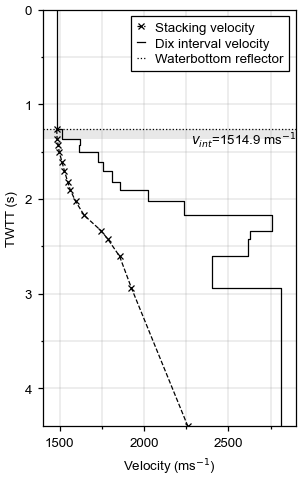

In [3]:
fig, ax = plt.subplots()
ax.plot(v_rms[1:], twtt[1:], 'kx--', label='Stacking velocity')
ax.plot(v_dix, twtt_dix[1:-1], 'k-', label='Dix interval velocity')
ax.axhline(twtt[1], c='k', linestyle='dotted', label='Waterbottom reflector')
ax.axhspan(twtt[1], twtt[1] + interval, facecolor='lightgrey', alpha=0.5, zorder=-999)
ax.annotate(f'$v_{{int}}$={v_ave:.1f} ms$^{{-1}}$',
            xy=(1, twtt[1]),
            xycoords=ax.get_yaxis_transform(),
           va='top', ha='right')
ax.legend(loc='upper right')
ax.set(
    xlim=(1400, 2900),
    ylim=(twtt.max(), 0),
    xlabel='Velocity (ms$^{-1}$)',
    ylabel='TWTT (s)',
)
ax.set_yticks(np.arange(0, twtt.max(), 1.0))
ax.set_yticks(np.arange(0, twtt.max(), 0.5), minor=True)
ax.set_xticks(np.arange(1500, 3000, 500))
ax.set_xticks(np.arange(1500, 3000, 250), minor=True)
ax.grid('on', which='both')

In [4]:
fig.savefig('../../manuscript/figures/si_fig13.pdf')